<a id="1"></a>
# <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:130%; font-family:Pacifico; background-color:#3170af; overflow:hidden"><b>Pingouins Clustering Projects</b></div>


## Project Context
This project is part of my training program and aims to support a team of researchers who have been gathering data on penguins in Antarctica. The dataset, provided in a CSV file named `penguins.csv`, was collected by Dr. Kristen Gorman and the Palmer Station, a member of the Long Term Ecological Research (LTER) Network. This collection offers valuable insights into penguin characteristics across the region.

## Data Overview
The dataset includes five main variables, each describing a specific characteristic of the penguins observed:

| Column             | Description                        |
|--------------------|------------------------------------|
| culmen_length_mm   | Culmen length in millimeters      |
| culmen_depth_mm    | Culmen depth in millimeters       |
| flipper_length_mm  | Flipper length in millimeters     |
| body_mass_g        | Body mass in grams                |
| sex                | Sex of the penguin                |

The researchers have not been able to record the species of each penguin but know that at least three species are native to this region: **Adelie**, **Chinstrap**, and **Gentoo**.

## Project Objective
Using data science and unsupervised learning techniques, the goal of this project is to identify meaningful clusters within the dataset that may correspond to different species or distinct groups of penguins. The primary tasks include:

1. Importing, investigating, and pre-processing the `penguins.csv` dataset.
2. Applying cluster analysis to group the data based on a suitable number of clusters.
3. Calculating the average values for each cluster and presenting these in a DataFrame named `stat_penguins`. This DataFrame will contain one row per cluster, displaying the mean of the original numeric variables, excluding any non-numeric columns.


In [31]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Loading and examining the dataset
penguins_df = pd.read_csv("Dataset/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
penguins_df.shape

(332, 5)

In [5]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


## 1 - Perform preprocessing steps on the dataset to create dummy variables

In [7]:
# Create dummy variables for the 'sex' column
dummies = pd.get_dummies(penguins_df["sex"], prefix="sex")

In [8]:
# Convert boolean columns (True/False) to integers (0/1)
dummies = dummies.astype(int)
# Add the new columns to the original DataFrame
penguins_df = pd.concat([penguins_df, dummies], axis=1)

In [9]:
# Delete the 'sex' column from the DataFrame
penguins_df.drop('sex', axis=1, inplace=True)

In [10]:
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,1,0
328,46.8,14.3,215.0,4850.0,1,0
329,50.4,15.7,222.0,5750.0,0,1
330,45.2,14.8,212.0,5200.0,1,0


### Standardizing Features with StandardScaler

StandardScaler is used to standardize features by scaling them to have a mean of 0 and a standard deviation of 1, which ensures that all features contribute equally to the model, preventing any single feature with a larger scale from dominating the learning process.

In [11]:
# Convert all columns to float64 type 
penguins_df = penguins_df.astype('float64')

In [12]:
# Initialize Standard Scaler
scaler = StandardScaler()

In [13]:
# Apply scaler to all columns
penguins_df[:] = scaler.fit_transform(penguins_df)

In [14]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


In [15]:
# Verify the mean and std
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02
mean,-4.708416e-16,1.284113e-16,7.276642e-16,4.280378e-17,1.391123e-16,-1.391123e-16
std,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00,1.001509e+00
min,-2.189667e+00,-2.070694e+00,-2.067519e+00,-1.871059e+00,-9.939939e-01,-1.006042e+00
25%,-8.304338e-01,-7.934376e-01,-7.831643e-01,-8.153502e-01,-9.939939e-01,-1.006042e+00
50%,1.247034e-01,7.509650e-02,-2.836929e-01,-2.253950e-01,-9.939939e-01,9.939939e-01
75%,8.456482e-01,7.903599e-01,8.579560e-01,7.138756e-01,1.006042e+00,9.939939e-01
max,2.861539e+00,2.220887e+00,2.142311e+00,2.600180e+00,1.006042e+00,9.939939e-01


## 2. Detect the optimal number of clusters for k-means clustering



The elbow method helps choose the optimal number of clusters by identifying the point where the reduction in inertia slows down. This "elbow" indicates the best balance between model simplicity and accurate grouping, avoiding overfitting with too many clusters.

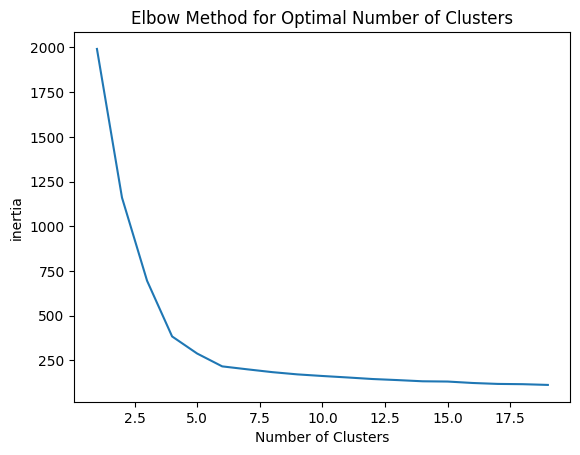

In [17]:
# List to store the WCSS (Within-Cluster Sum of Squares)
inertia = []

# Perform clustering for a range of cluster numbers
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(penguins_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.plot(range(1, 20), inertia)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()


The ideal number of clusters to use is 4.
Using more clusters may lead to overfitting, where the model becomes too complex and captures noise rather than true patterns in the data.

## Run the k-means clustering algorithm

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


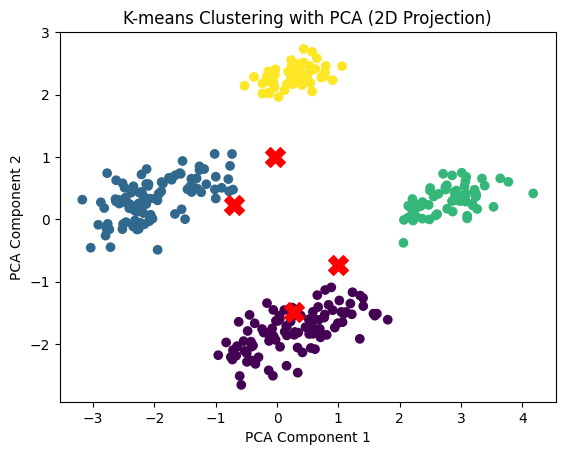

In [32]:
# Instantiating the KMeans model
model = KMeans(n_clusters=4)  # Using 4 clusters for this example

# Fit the model on all 6 features
model.fit(penguins_df)

# Predict the clusters
labels = model.predict(penguins_df)

# Reduce the data to 2D for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(penguins_df)

# Visualize the clusters in 2D
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')  # Points colored by cluster
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroids
plt.title("K-means Clustering with PCA (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()